In [8]:
##importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
##reading csv files 
city="raw_data/city_data.csv"
ride="raw_data/ride_data.csv"

city_table=pd.read_csv(city)
ride_table=pd.read_csv(ride)

In [10]:
## groupin the city tables by city to eliminate the duplicate city Port James
city_group= city_table.groupby('city')
## getting the sum of driver count for portjames, the rest will stay the same
drive=city_group['driver_count'].sum()
city_type=city_group['type'].last()
cleaned_city_file= pd.DataFrame({"driver_count":drive,"type":city_type})

In [11]:
calc_ride=ride_table
city_group=calc_ride.groupby('city')
tot_number_of_rides=city_group['ride_id'].count()
avg_fare=city_group['fare'].mean()
total_fare=city_group['fare'].sum()
update_ride=pd.DataFrame({"Total Number of Rides":tot_number_of_rides,"Average Fare":avg_fare,'Total Fare':total_fare})

In [12]:
merged_table=update_ride.join(cleaned_city_file)
new_merged=merged_table.reset_index()
new_merged.head()

,city,Average Fare,Total Fare,Total Number of Rides,driver_count,type
0,Alvarezhaven,23.928710,741.79,31,21,Urban
1,Alyssaberg,20.609615,535.85,26,67,Urban
2,Anitamouth,37.315556,335.84,9,16,Suburban
3,Antoniomouth,23.625000,519.75,22,21,Urban
4,Aprilchester,21.981579,417.65,19,49,Urban


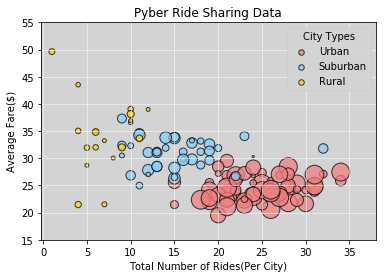

In [15]:
## Bubble Plot
## filtering the merged table to urban only
urban_table=new_merged.loc[new_merged['type']=='Urban']
## filtering the merged table to Suburban only
Suburban_table=new_merged.loc[new_merged['type']=='Suburban']
## filtering the merged table to Rural only
Rural_table=new_merged.loc[new_merged['type']=='Rural']
##plotting each category, mulitplied the s by 5 to increase the size of bubble on the the map
plt.scatter(urban_table['Total Number of Rides'],urban_table['Average Fare'],marker="o", facecolors="lightcoral", edgecolors='black',
            s=urban_table['driver_count']*5, alpha=0.75,label='Urban')
plt.scatter(Suburban_table['Total Number of Rides'],Suburban_table['Average Fare'],marker="o", facecolors="lightskyblue", edgecolors="black",
            s=Suburban_table['driver_count']*5, alpha=0.75,label='Suburban')
plt.scatter(Rural_table['Total Number of Rides'],Rural_table['Average Fare'],marker="o", facecolors="gold", edgecolors="black",
            s=Rural_table['driver_count']*5, alpha=0.75,label='Rural')
## changing the color of background to light grey
plt.rcParams['axes.facecolor']='lightgrey'
plt.grid(linewidth=0.5,color='white')
##printing the legend
lgn=plt.legend(title="City Types")
## standarizing the size of the legend
lgn.legendHandles[0]._sizes=[30]
lgn.legendHandles[1]._sizes=[30]
lgn.legendHandles[2]._sizes=[30]
## printing the ylabel
plt.ylabel('Average Fare($)')
## printing the xlabel
plt.xlabel('Total Number of Rides(Per City)')
## printing the title
plt.title('Pyber Ride Sharing Data')
## setting the limits for both the x and y
plt.ylim(15,55)
plt.xlim(-0.25,38)


plt.show()

In [16]:
## creating the new data frame for the Pie Charts
group_types=new_merged.groupby('type')
tot_rides=group_types['Total Number of Rides'].sum()
tot_fare=group_types['Total Fare'].sum()
tot_drivers=group_types['driver_count'].sum()
pie_chart_info=pd.DataFrame({'Rides':tot_rides,'Fare':tot_fare,'Drivers':tot_drivers})


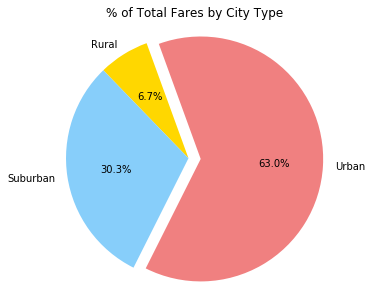

In [17]:
## Total fares by city type pie chart
pie_chart_info.plot( y='Fare',kind='pie',legend=None,figsize=(5,5),title='% of Total Fares by City Type',autopct= '%1.1f%%',colors=['gold','lightskyblue','lightcoral'],explode=[0,0,0.1], startangle=110)
plt.axis('equal')
plt.ylabel('')
plt.show()

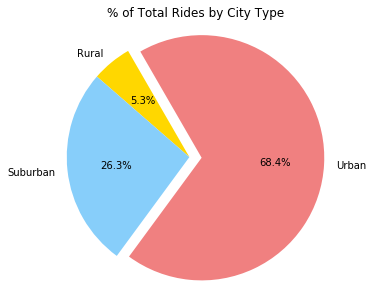

In [18]:
## Total Rides pie Chart
pie_chart_info.plot( y='Rides',kind='pie',legend=None,figsize=(5,5),title='% of Total Rides by City Type',autopct= '%1.1f%%',colors=['gold','lightskyblue','lightcoral'],explode=[0,0,0.1], startangle=120)
plt.axis('equal')
plt.ylabel('')
plt.show()

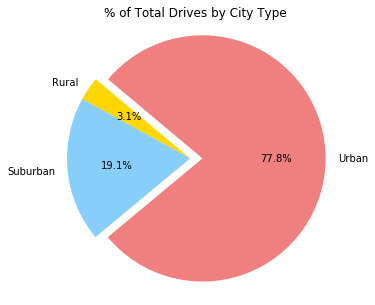

In [19]:
## Total Drives pie chart
pie_chart_info.plot( y='Drivers',kind='pie',legend=None,figsize=(5,5),title='% of Total Drives by City Type',autopct= '%1.1f%%',colors=['gold','lightskyblue','lightcoral'],explode=[0,0,0.1], startangle=140)
plt.axis('equal')
plt.ylabel('')
plt.show()